<center><font size = "10"> Week 8 - Synapses <center>
<center><font size = "8">Home work 

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 8
<br>Group member1: Chiara Maria Matti
<br>Group member2: Elena Grazia Gado
<br>Group member3: Eliser Josan Romero
    
__IMPORTANT:__<font size = "3"> assignements to be delivered by next Monday before 23:59.

In [38]:
# For this exercises just compile channel and synaptic mechanisms at the begining and you won't need to do this again.
!nrnivmodl

'nrnivmodl' is not recognized as an internal or external command,
operable program or batch file.


In [39]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')
sns.set(font_scale=1.1)

%matplotlib inline

# <font color= 'red'>Ex 1:</font> Plot the dependence of the NMDA conductance on the Mg2+ concentration.

<font size='3'>Create a single compartmental soma neuron to host the synpase modeled in SimpleAMPA_NMDA.mod file. Using the stimulation pattern and the values for the synaptic conductances used in tutorial 01, plot the NMDA conductance at different mM [Mg2+] values. Select appropiate values to explore the dynamics. 
    
<font size='3'> What happens to the NMDA conducatance in relation to Mg2+? What is the functional purpose of this behaviour?
    
<font size='3'><font color= 'red'>[0.5 pts]</font>

<span style="color:purple"> 
<font size='3'> 
    
## **Grading**: 
- [0.1 pt] for good coding and having the plot
- [0.2 pt] explaning NMDA conductance in relation to Mg2+
- [0.2 pt] explaning functional purpose

[/0.5 pt]    
</span>

# <font color= 'red'>Ex 2:</font>  Configure a pseudolinear synapse (E1)
    
<font size='3'> Create a single compartmental soma neuron, add to it passive properties, add to the center of the neuron a synapse with the mechanism modeled in TsodyksMarkram_AMPA_NMDA.mod file, inject a stimulation pattern and define the conductances for NMDA and AMPA receptors, as it was done in tutorial 02. 

<font size='3'>Play around with `U1`, `tau_rec` and `tau_facil` , and find the values that make the synapse _pseudolinear_, so that it first undergoes facilitation, and then a depression as the stimulus goes on for longer. 

<font size='3'> Plot the `R`, `Use` and conductance curves. Explain in your own words what `U1`, `tau_rec` and `tau_facil` represent.
    
<font size='3'>Plot comparison (bar plot) between the three parameters for each of the three synapse types(facilitating, depressing and pseudolinear). Explain the relationships between the parameter values and the properties of the synapse type they belong to.
    
 
    
<font size='3'><font color= 'red'>[1.5 pts]</font>

<span style="color:purple"> 
<font size='3'> 
    
## **Grading**: 
- [0.75 pt] for correct setup and plots of facilitating synapses plots
- [0.75 pt] for definition of the parameters, visualization and comparison 

[/1.5 pt]    
</span>

# <font color= 'red'>Ex 3:</font>  Compute EPSP's Features: amplitudes, latencies, tau rise and Coefficient of Variation (CV) of the EPSP amplitudes 

<font size='3'>Compute the amplitudes, latencies and tau rise of the excitatory postsynaptic potential (EPSP) of the three connections traces provided for your group (.h5 files you can find in the group folder). Visualize the mean values and standard deviations of this features.


<font size='3'>Then compute the coefficient of variation of EPSP amplitudes for each of the connections and the mean CV profile between them. Visualize your results in two plots:
- mean CV profiles: the plot should have four curves, one per each connection and one for the mean
- raster plot of CV of EPSP amplitudes as a function of EPSP amplitudes (all EPSPS, not only the first one)

<font size='3'>Both plots should look similar to the ones in the paper show in the lecture [Barros-Zulaica et al., 2019](https://www.ncbi.nlm.nih.gov/pubmed/31680928), Figure 1 D and F and Figure 6 D and F. 
    
<font size='3'>*Hint: Be careful with which plot should have a standard deviations!*
    
__Note that for all the files, the stimulation times are the same as in tutorial 3.__

<font size='3'><font color= 'red'>[2 pts]</font>

#### a) Getting the data from the .h5 files

In [40]:
# Open and print keys to check how many sweeps (repetitions) of the experiment there are in the file
data_c4 = h5py.File("Group8/connection_c4.h5", "r")
data_c60 = h5py.File("Group8/connection_c60.h5", "r")
data_c75 = h5py.File("Group8/connection_c75.h5", "r")
print(data_c4.keys())
print(data_c60.keys())
print(data_c75.keys())
c_types = ['c4', 'c60', 'c75']
datas = [data_c4, data_c60, data_c75]

<KeysViewHDF5 ['v0', 'v1', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v2', 'v20', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']>
<KeysViewHDF5 ['v0', 'v1', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v2', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']>
<KeysViewHDF5 ['v0', 'v1', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v2', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']>


#### b) Plotting traces

In [41]:
def tracing(data):
    """Create a data array and compute the mean trace by computing the mean of all sweeps"""
    traces = []
    for key in data.keys():
        traces.append(data.get(key))

    traces = np.array(traces)

    mean_trace = np.mean(traces, axis=0)
    std_trace = np.std(traces, axis=0)
    return traces, mean_trace, std_trace

def plot_trace(ax, mean_trace, traces, std_trace, c_type):
    """plot the sweeps and the mean voltage trace"""
    
    for trace in traces:
        ax.plot(trace, "b--")

    ax.plot(mean_trace, "r")
    ax.fill_between(np.arange(len(mean_trace)), mean_trace - std_trace, mean_trace + std_trace, alpha=0.3, color ='r')
    ax.set_title(f"Sweep and Mean voltage trace of connection {c_type}")
    ax.set_ylabel('V (V)')
    ax.set_xlabel('time (ms)')

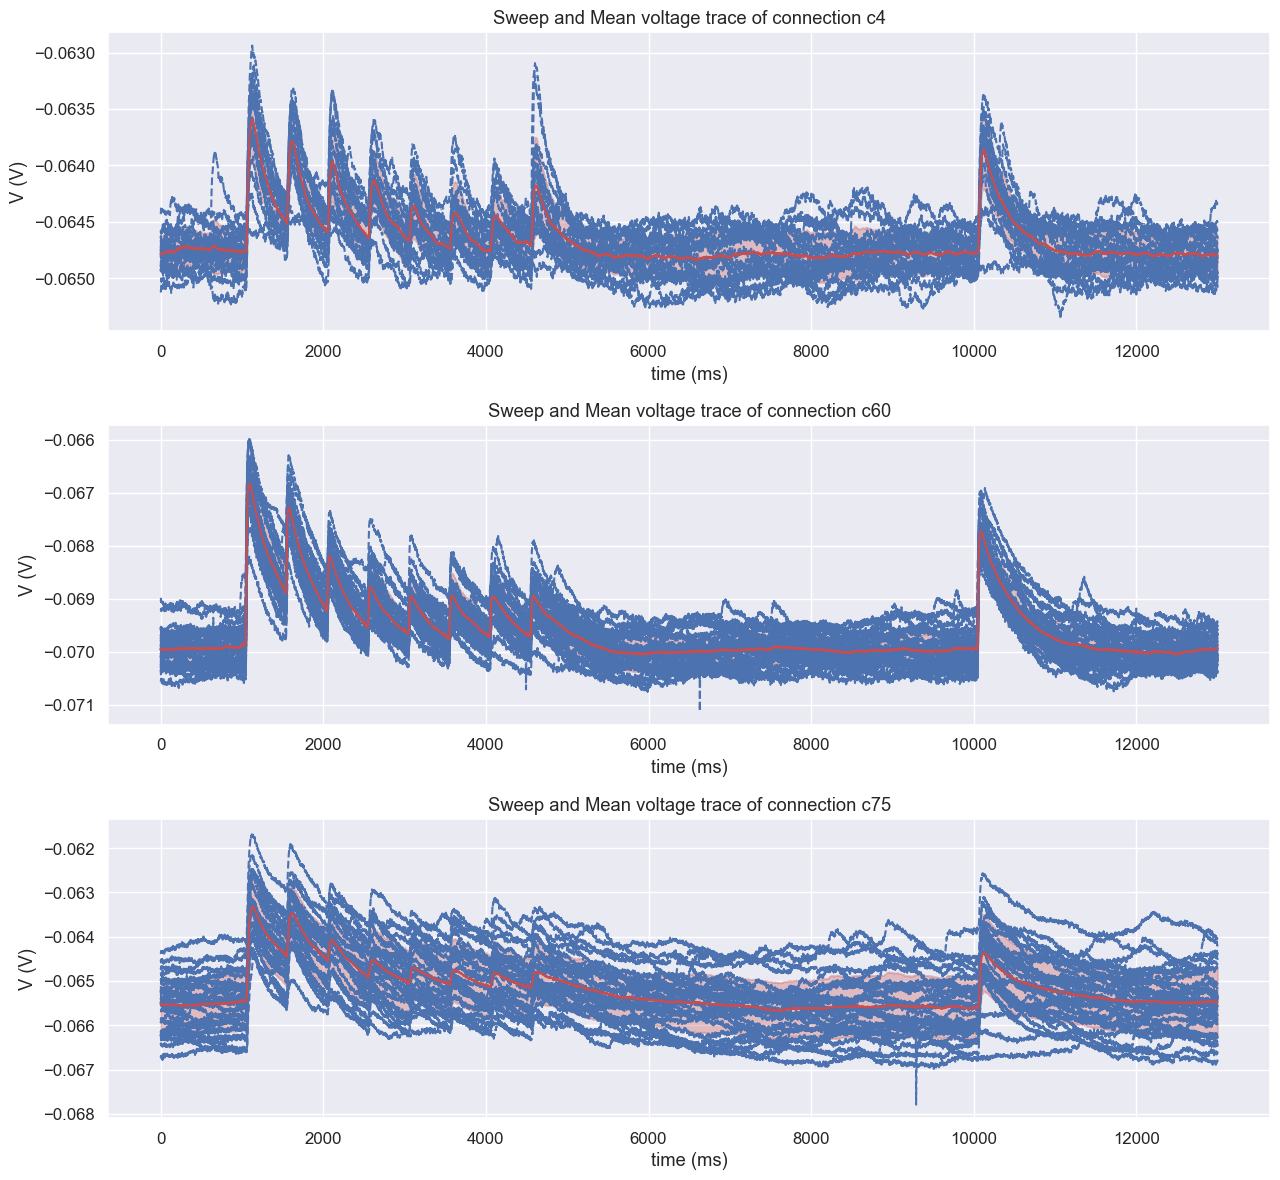

In [42]:
traces = []
mean_traces = []
std_traces = []
fig, axes = plt.subplots(3, 1, figsize=(13, 12))
axs = axes.flatten()
for data, c_type, ax in zip(datas, c_types, axs):
    trace, mean_trace, std_trace = tracing(data)
    traces.append(trace)
    mean_traces.append(mean_trace)
    std_traces.append(std_trace)
    plot_trace(ax, mean_trace, trace, std_trace, c_type)
plt.tight_layout()

#### c) Extracting features from first EPSP: tau rise, latency and amplitude

In [43]:
def extract_PSP_window(trace, time, stimulation_index, time_before=50, time_after=300):
    """Extract a time window with a single EPSP trace"""
    psp_trace = trace[stimulation_index - time_before : stimulation_index + time_after]
    psp_time = time[stimulation_index - time_before : stimulation_index + time_after]

    return psp_trace, psp_time

def extract_EPSP_features(psp_trace, psp_time, stimulation_time):
    """
    Function takes in a EPSP curve and calculates the following features: amplitude;
    5%, 20% and 80% of the amplitude, tau rise and latency. Based on defintions from
    Feldmeyer et al., 1999.

    Parameters
    ----------
    psp_trace : array with voltage trace [mV]
    psp_time : array of psp times [s]
    stimulation_time : time of the stimulation [s]

    Returns
    -------
    psp_percent : dictionary with psp amplitudes at 5%, 20% and 80% of the amplitude
    times : dictionary with psp times at 5%, 20% and 80% of the amplitude
    amplitude : amplitude of the first EPSP computed as the difference between the 20 and the 80 % of rise
    tau_rise : distance between the time of 20% and 80% of the rise of the EPSP [s]
    latency : time between the AP of the presynaptic cell and 5% amplitude rise of the EPSP [s]
    """

    # find absolute values of the psp trace
    max_psp = np.max(psp_trace)
    min_psp = np.min(psp_trace)
    amplitude_psp = np.abs(max_psp - min_psp)

    # compute percentages of amplitudes
    twenty_amplitude = amplitude_psp * 80.0 / 100.0
    eighty_amplitude = amplitude_psp * 20.0 / 100.0
    five_amplitude = amplitude_psp * 95.0 / 100.0
    amplitude = eighty_amplitude - twenty_amplitude

    # compute amplitude percentages on the psp trace
    psp_percent = {
        "five": -(five_amplitude - max_psp),
        "twenty": -(twenty_amplitude - max_psp),
        "eighty": -(eighty_amplitude - max_psp),
    }

    # find corresponding index of an array
    five_index = np.where(psp_trace >= psp_percent["five"])[0][0]
    twenty_index = np.where(psp_trace >= psp_percent["twenty"])[0][0]
    eighty_index = np.where(psp_trace >= psp_percent["eighty"])[0][0]

    # extract time points for percentage points of the trace
    psp_times = {
        "five": psp_time[five_index],
        "twenty": psp_time[twenty_index],
        "eighty": psp_time[eighty_index],
    }
    
    # calculate time features of a PSP
    tau_rise = np.abs((psp_times["twenty"] - psp_times["eighty"]))
    latency = np.abs((psp_times["five"]) - stimulation_time)

    return psp_percent, psp_times, amplitude, tau_rise, latency

def extract_multi_EPSP_features(trace, time, stimulation_index):
    psp_traces = []
    psp_times = []
    amplitudes = []
    tau_rises = []
    latencies = []
    
    for index in stimulation_index:
        stimulation_time = time[index]
        psp_trace, psp_time = extract_PSP_window(trace, time, index)
        _, _, amplitude, tau_rise, latency = extract_EPSP_features(psp_trace, psp_time, stimulation_time)

        psp_traces.append(psp_trace)
        psp_times.append(psp_time)
        amplitudes.append(amplitude)
        tau_rises.append(tau_rise)
        latencies.append(latency)

    return psp_traces, psp_times, amplitudes, tau_rises, latencies

def multi_co_extraction(traces, time, stimulation_indices):
    """Extracts all features for all traces of 1 connection type"""
    amplitudes = []
    tau_rises = []
    latencies = []

    psp_traces = []
    psp_percents = []
    psp_times = []

    mean_latencies = []
    mean_amplitudes = []
    mean_tau_rises = []

    std_latencies = []
    std_amplitudes = []
    std_tau_rises = []

    for trace in traces:
        psp_trace, psp_time, amplitude, tau_rise, latency = extract_multi_EPSP_features(trace, time, stimulation_indices)
        # all means per trace
        mean_amplitude = np.mean(amplitude)
        mean_latency = np.mean(latency)
        mean_tau_rise = np.mean(tau_rise)
        
        # all stds per trace
        std_latency = np.std(latency)
        std_amplitude = np.std(amplitude)
        std_tau_rise = np.std(tau_rise)

        psp_traces.append(psp_trace)
        psp_times.append(psp_time)
        amplitudes.append(amplitude)
        tau_rises.append(tau_rise)
        latencies.append(latency)

        mean_amplitudes.append(mean_amplitude)
        mean_latencies.append(mean_latency)
        mean_tau_rises.append(mean_tau_rise)

        std_amplitudes.append(std_amplitude)
        std_latencies.append(std_latency)
        std_tau_rises.append(std_tau_rise)
    return psp_traces, psp_times, amplitudes, tau_rises, latencies, mean_amplitudes, mean_latencies, mean_tau_rises, std_amplitudes, std_latencies, std_tau_rises

def plot_feature(ax, mean, std, title, ylab, xlab, co_lab):
    stim_lim = 9
    ax.plot(mean, label=co_lab)
    ax.fill_between(np.arange(len(mean)), np.array(mean) - np.array(std), np.array(mean) + np.array(std), alpha=0.2)
    ax.set_xlim(0, stim_lim)
    ax.set_title(title)
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    

def add_all_connect_mean_std(all_mean, type="mean"):
    """Get mean and std of a features of all 3 connection type"""
    all_feat = all_mean.copy()
    df = pd.DataFrame(all_mean)
    if type == "mean":
        result = np.array(df.mean(axis=0, skipna=True))
    elif type == "std":
        result = np.array(df.std(axis=0, skipna=True))
    all_feat.append(result)
    return all_feat


##### Defining time array and stimulation protocol

In [44]:
time = np.linspace(0, 1.3, 13000)
stimulation_indices = np.array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000])

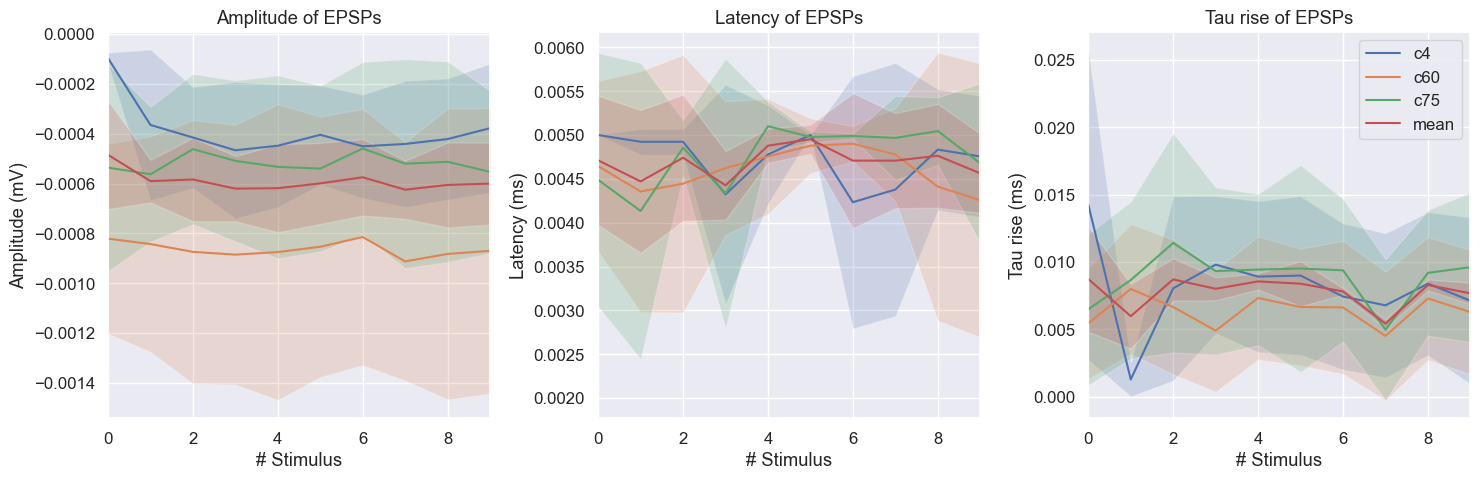

In [45]:
all_amplitudes = []
all_tau_rises = []
all_latencies = []

all_psp_traces = []
all_psp_percents = []
all_psp_times = []

all_mean_latencies = []
all_mean_amplitudes = []
all_mean_tau_rises = []

all_std_latencies = []
all_std_amplitudes = []
all_std_tau_rises = []

for trace in traces:
    psp_traces, psp_times, amplitudes, tau_rises, latencies, mean_amplitudes, mean_latencies, mean_tau_rises, std_amplitudes, std_latencies, std_tau_rises = multi_co_extraction(trace, time, stimulation_indices)
    all_amplitudes.append(amplitudes)
    all_tau_rises.append(tau_rises)
    all_latencies.append(latencies)
    all_psp_traces.append(psp_traces)
    all_psp_times.append(psp_times)

    all_mean_latencies.append(mean_latencies)
    all_mean_amplitudes.append(mean_amplitudes)
    all_mean_tau_rises.append(mean_tau_rises)

    all_std_latencies.append(std_latencies)
    all_std_amplitudes.append(std_amplitudes)
    all_std_tau_rises.append(std_tau_rises)


all_mean_amplitudes = add_all_connect_mean_std(all_mean_amplitudes, type="mean")
all_mean_latencies = add_all_connect_mean_std(all_mean_latencies, type="mean")
all_mean_tau_rises = add_all_connect_mean_std(all_mean_tau_rises, type="mean")

all_std_amplitudes = add_all_connect_mean_std(all_std_amplitudes, type="std")
all_std_latencies = add_all_connect_mean_std(all_std_latencies, type="std")
all_std_tau_rises = add_all_connect_mean_std(all_std_tau_rises, type="std")

connections = ['c4', 'c60', 'c75', 'mean']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axs = axes.flatten()
for mean_amplitudes, std_amplitudes, mean_latencies, std_latencies, mean_tau_rises, std_tau_rises, co in zip(all_mean_amplitudes, all_std_amplitudes, all_mean_latencies, all_std_latencies, all_mean_tau_rises, all_std_tau_rises, connections):
    plot_feature(axs[0], mean_amplitudes, std_amplitudes, "Amplitude of EPSPs", "Amplitude (mV)", "# Stimulus", co)
    plot_feature(axs[1], mean_latencies, std_latencies, "Latency of EPSPs", "Latency (ms)", "# Stimulus", co)
    plot_feature(axs[2], mean_tau_rises, std_tau_rises, "Tau rise of EPSPs", "Tau rise (ms)", "# Stimulus", co)

plt.legend()
plt.tight_layout()





##### Calculating and visualizing the features

In [46]:

def extraction_mean(mean_trace, time, stimulation_indices):
    """Apply extraction of PSP windows and EPSP features for all connection files"""
    psp_trace, psp_time = extract_PSP_window(mean_trace, time, stimulation_indices[0])
    psp_percent, psp_times, amplitude, tau_rise, latency = extract_EPSP_features(
        psp_trace, psp_time, stimulation_time
    )
    return psp_trace, psp_time, psp_percent, psp_times, amplitude, tau_rise, latency

def plot_features(ax, c_type, psp_trace, psp_time, psp_percent, psp_times, amplitude, tau_rise, latency):
    """ Plot features for a single connection"""
    ax.plot(psp_time, psp_trace, label="first EPSP")
    ax.scatter(psp_times["five"], psp_percent["five"], c="g", label="5%")
    ax.scatter(psp_times["twenty"], psp_percent["twenty"], c="r", label="20%")
    ax.scatter(psp_times["eighty"], psp_percent["eighty"], c="m", label="80%")
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Voltage [V]")
    ax.set_title(f"PSP amplitude for connection {c_type}")
    ax.legend()
    print("Features for connection ", c_type, ":")
    print("Amplitude = ", np.abs(amplitude*1000.0), "mV")
    print("Tau_rise = ", tau_rise, "s")
    print("latency = ", latency, "s \n")

Features for connection  c4 :
Amplitude =  0.7121430976050254 mV
Tau_rise =  0.0028002154011847052 s
latency =  0.005500423109469965 s 

Features for connection  c60 :
Amplitude =  1.8637497723102607 mV
Tau_rise =  0.0013001000076929004 s
latency =  0.004600353873374874 s 

Features for connection  c75 :
Amplitude =  1.2927506119012806 mV
Tau_rise =  0.002300176936687437 s
latency =  0.005800446188168329 s 

Mean features:
Mean amplitude =  1.289547827272189 mV
Mean tau_rise =  0.002133497448521681 s
Mean latency =  0.005300407723671056 s 

Std features:
Std amplitude =  0.4701469108540774 mV
Std tau_rise =  0.000623657538119101 s
Std latency =  0.0005099411776037135 s


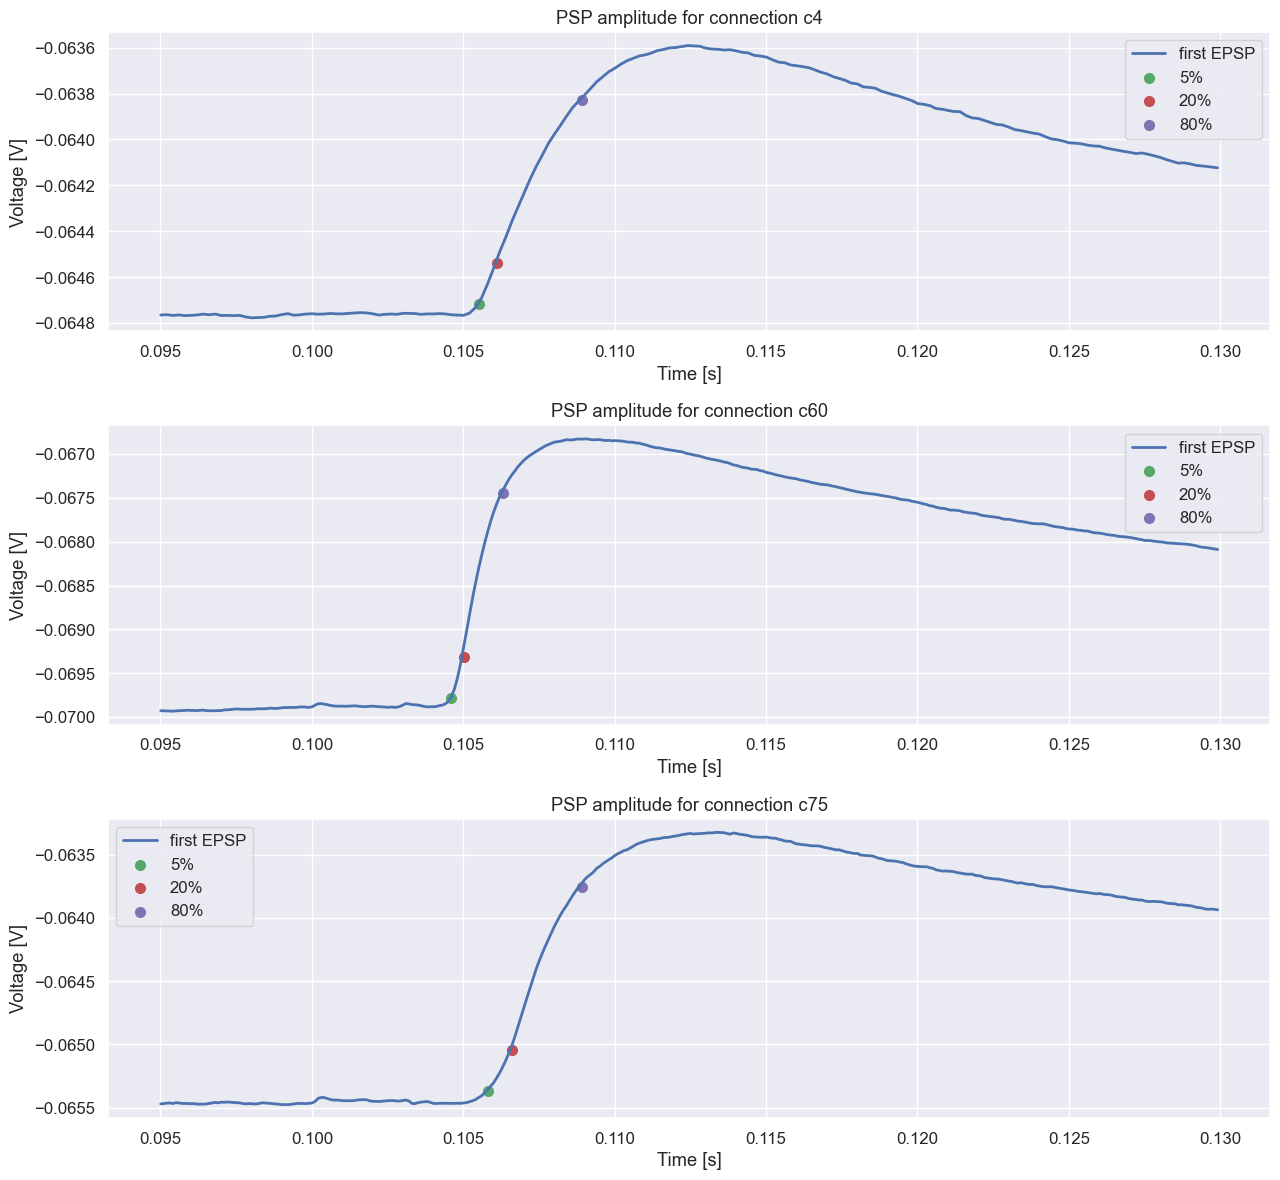

In [47]:
stimulation_time = time[stimulation_indices[0]]

# initiating vectors of features
amplitudes = []
tau_rises = []
latencies = []
psp_traces = []
psp_time = []
psp_percents = []
psp_times = []

plt.rcParams['lines.markersize'] = 7
plt.rcParams['lines.linewidth'] = 2 
fig, axes = plt.subplots(3, 1, figsize=(13, 12))
axs = axes.flatten()
for mean_trace, ax, c_type in zip(mean_traces, axs, c_types):
    # getting features
    psp_trace, psp_tim, psp_percent, psp_tims, amplitude, tau_rise, latency = extraction_mean(mean_trace, time, stimulation_indices)
    # stocking features
    amplitudes.append(amplitude)
    tau_rises.append(tau_rise)
    latencies.append(latency)
    psp_traces.append(psp_trace)
    psp_time.append(psp_tim)
    psp_percents.append(psp_percent)
    psp_times.append(psp_tims)
    # plot features of each c_type
    plot_features(ax, c_type, psp_trace, psp_tim, psp_percent, psp_tims, amplitude, tau_rise, latency)

plt.tight_layout()


# mean features
mean_amplitudes = np.mean(amplitudes)
mean_tau_rises = np.mean(tau_rises)
mean_latencies = np.mean(latencies)
print("Mean features:")
print("Mean amplitude = ", np.abs(mean_amplitudes*1000.0), "mV")
print("Mean tau_rise = ", mean_tau_rises, "s")
print("Mean latency = ", mean_latencies, "s \n")

# std features
std_amplitudes = np.std(amplitudes)
std_tau_rises = np.std(tau_rises)
std_latencies = np.std(latencies)
print("Std features:")
print("Std amplitude = ", np.abs(std_amplitudes*1000.0), "mV")
print("Std tau_rise = ", std_tau_rises, "s")
print("Std latency = ", std_latencies, "s")

plt.show()


#### d) Computing amplitudes of all EPSP of the mean trace

In [48]:
def extract_amplitude(psp_trace):
    """Extract amplitude from a single EPSP trace and convert to mV"""
    max_psp = np.max(psp_trace)
    min_psp = np.min(psp_trace)
    std_psp = np.std(psp_trace)

    return np.abs(max_psp - min_psp) * 1000, std_psp * 1000

In [49]:
def amp_extraction(mean_trace, time, stimulation_indices):
    """Extract amplitudes of all connections"""
    amplitudes = np.array([])
    stds = np.array([])
    for index in stimulation_indices:
        psp_trace, psp_time = extract_PSP_window(mean_trace, time, index)
        amp, std = extract_amplitude(psp_trace)

        amplitudes = np.append(amplitudes, amp)
        stds = np.append(stds, std)
    return psp_trace, psp_time, amplitudes, stds
    
def plot_amplitudes(c_type, psp_trace, psp_time, amplitudes, stds):
    """Plot amplitudes of all connections"""
    print(stimulation_indices, time.shape)
    ax[0].scatter(time[stimulation_indices], amplitudes, label=c_type)
    ax[0].errorbar(time[stimulation_indices], amplitudes, yerr=stds, capsize=3)
    ax[1].plot(time, mean_trace, label=c_type)
    #ax[0].set_title(f"Amplitudes of connection {c_type}")
    #ax[1].set_title(f"Mean trace of connection {c_type}")
    ax[0].set_ylabel("Voltage [mV]")
    ax[1].set_ylabel("Voltage [V]")
    ax[1].set_xlabel("Time [ms]")
    


[ 1000  1500  2000  2500  3000  3500  4000  4500 10000] (13000,)
[ 1000  1500  2000  2500  3000  3500  4000  4500 10000] (13000,)
[ 1000  1500  2000  2500  3000  3500  4000  4500 10000] (13000,)


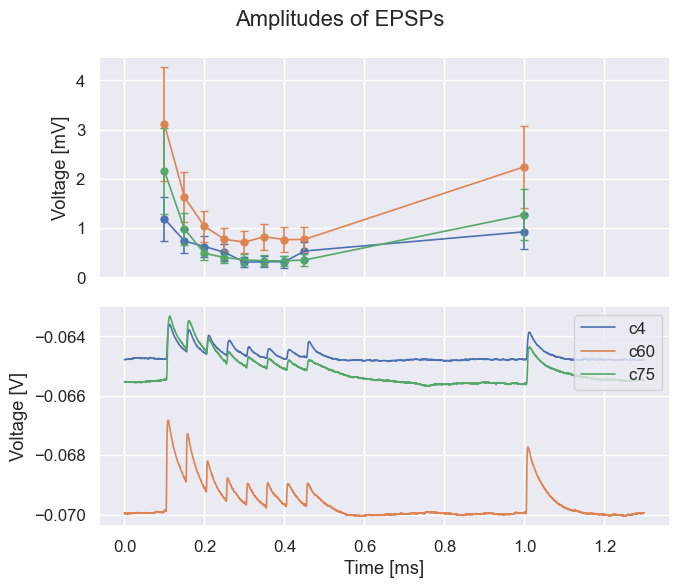

In [50]:
# initiating vectors of features
amplitudes = []
psp_traces = []
psp_time = []
stds = []
plt.rcParams['lines.markersize'] = 5
plt.rcParams['lines.linewidth'] = 1.2
fig, ax = plt.subplots(2, 1, figsize=(7, 6), sharex=True)
fig.suptitle(f"Amplitudes of EPSPs")
for mean_trace, c_type in zip(mean_traces, c_types):
    # getting features
    psp_trace, psp_tim, amplitude, std = amp_extraction(mean_trace, time, stimulation_indices)
    # stocking features
    amplitudes.append(amplitude)
    psp_traces.append(psp_trace)
    psp_time.append(psp_tim)
    stds.append(std)
    plot_amplitudes(c_type, mean_trace, time, amplitude, std)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
    

#### e) Computing CV of EPSP amplitudes
<font size='3'>Then compute the coefficient of variation of EPSP amplitudes for each of the connections and the mean CV profile between them. Visualize your results in two plots:
- mean CV profiles: the plot should have four curves, one per each connection and one for the mean
- raster plot of CV of EPSP amplitudes as a function of EPSP amplitudes (all EPSPS, not only the first one)

<font size='3'>Both plots should look similar to the ones in the paper show in the lecture [Barros-Zulaica et al., 2019](https://www.ncbi.nlm.nih.gov/pubmed/31680928), Figure 1 D and F and Figure 6 D and F. 
    
<font size='3'>*Hint: Be careful with which plot should have a standard deviations!*

In [51]:
# CV formula
def compute_CV(mean_amplitudes, std_amplitudes):
    """Compute CV of amplitudes"""
    return np.array(std_amplitudes) / np.array(mean_amplitudes)



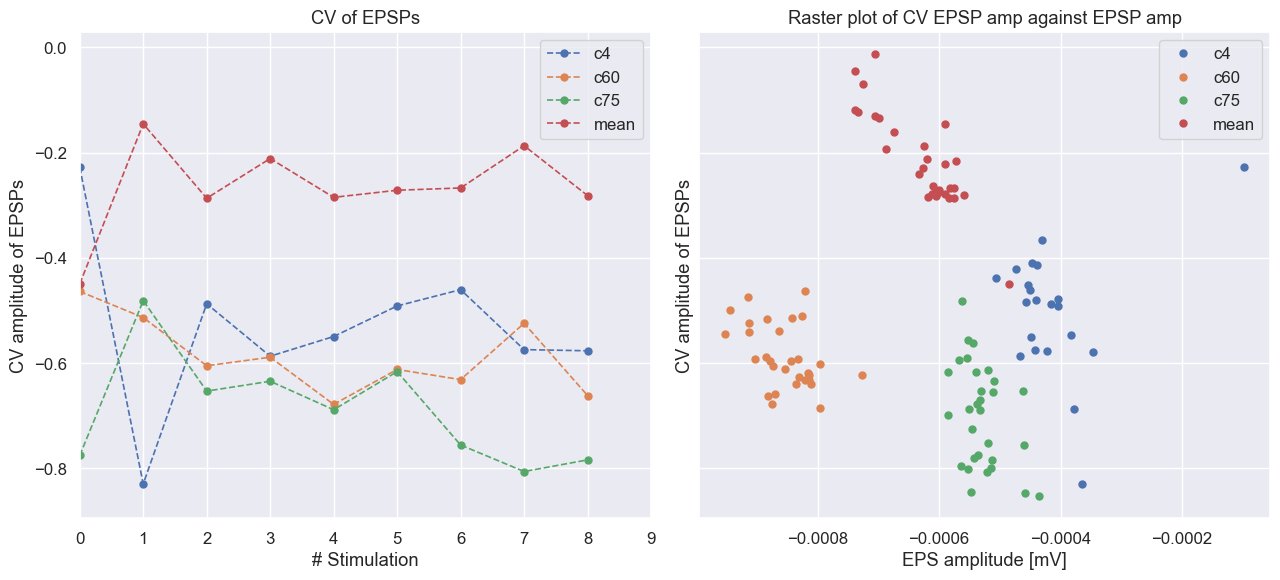

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6), sharey=True)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 1.2
stim_lim = 9
for mean_amplitudes, std_amplitudes, co in zip(all_mean_amplitudes, all_std_amplitudes, connections):
    cv = compute_CV(mean_amplitudes, std_amplitudes)
    axes[0].plot(cv[:stim_lim], '.--', label=co)
    axes[0].set_ylabel("CV amplitude of EPSPs")
    axes[0].set_xlabel("# Stimulation")
    axes[0].set_title("CV of EPSPs")
    axes[0].set_xlim(0, stim_lim)
    axes[0].legend()
    axes[1].plot(mean_amplitudes, cv, '.', label=co)
    axes[1].set_ylabel("CV amplitude of EPSPs")
    axes[1].set_xlabel("EPS amplitude [mV]")
    axes[1].set_title("Raster plot of CV EPSP amp against EPSP amp")
    axes[1].legend()

plt.tight_layout()
plt.show()


<span style="color:purple"> 
<font size='3'> 
    
## **Grading**: 
- [0.75 pt] for correct CV calculation and visualization
- [0.75 pt] for extracting means and std of tau_rec and latency
- [0.5] for plotting CV of as a function of EPSPs amplitude    

[/2 pt]    
</span>

# <font color='red'>Ex 4:</font> Compute failure rate
<font size='3'>
    
Compute the failure rate of the EPSPs from the connections of your group folder. The failure rate is the fraction of trials from which no PSP is generated above certain threshold. You can find a way of computing the failure rate in [Feldmeyer et al., 1999](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2269646/) (Methods - Data analysis). Make sure to test for failure based on both latency and amplitude size. Necessary noise can be extracted from the initial part of the simulation, before any stimulus arrives (use the code bellow).


- Represent the mean result of each of the three connections in the same bar plot. 
- For each connection visualize the distributions of the EPSPs amplitudes using a histogram, with a different color for failed and successful EPSPs.

<font size='3'>
    
<font color= 'red'>[2 pts]</font>

In [53]:
# CODE TO EXTRACT NOISE FROM YOUR TRACES:

def compute_noise(trace, stimulation_index, time_before=50):
    pre_psp_trace = trace[0 : stimulation_index - time_before]
    noise_max = np.max(psp_trace)
    noise_min = np.min(psp_trace)
    noise_amp = np.abs(noise_max - noise_min)
    return noise_amp * 1000


In [54]:
noise_collection = {}
for key in traces_collection:
    noise = []
    for psp_trace in traces:
        noise.append(compute_noise(psp_trace, stimulation_indices[0]))

    noise_collection[key] = np.array(noise)

noise_std = pd.DataFrame(noise_collection).std()

NameError: name 'traces_collection' is not defined

<span style="color:purple"> 
<font size='3'> 
    
## **Grading**: 
- [1 pt] for calculating failure rate
- [0.5 pt] for bar plots visualization 
- [0.5 pt] for EPSPs amplitudes histograms with failure/success split

[/2 pt]    
</span>